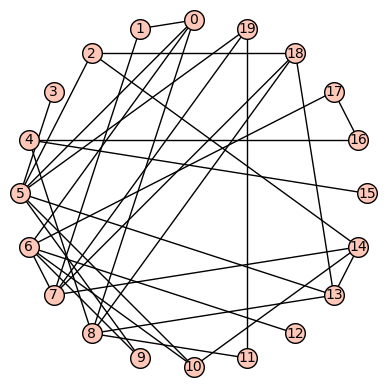

In [82]:
G=graphs.RandomGNP(20,0.2)
while not G.is_connected():
    G=graphs.RandomGNP(20,0.1)
G.plot(figsize=6,layout='circular')

In [85]:
def numero_de_triangulos(graph, i, j):
    # Encontrar vecinos comunes de i y j
    vecinos_comunes = set(graph.neighbors(i)) & set(graph.neighbors(j))

    # Contar triángulos formados por i, j y los vecinos comunes
    num_triangulos = 0
    for vecino in vecinos_comunes:
        if graph.has_edge(i, vecino) and graph.has_edge(j, vecino):
            num_triangulos += 1

    return num_triangulos

def radicchi(g):
    G = g.copy()
    dic = {}
    for arista in G.edges():
        i = arista[0]
        j = arista[1]
        gradoi = G.degree(i)
        gradoj = G.degree(j)
        
        if not (gradoi==1 or gradoj==1):
            triangulos = numero_de_triangulos(G, i, j)
            coeficiente = (triangulos+1)/min(gradoi-1, gradoj-1)
            dic[arista] = coeficiente
    valor_minimo = min(dic.values())
    aristas = [clave for clave, valor in dic.items() if valor == valor_minimo]
    
    for arista in aristas:
        G.delete_edge(arista)
    
    componentes_conexas = G.connected_components()

    colores_predefinidos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']
    colores = {v: colores_predefinidos[i % len(colores_predefinidos)] for i, componente in enumerate(componentes_conexas) for v in componente}

    # Crear un gráfico con colores diferentes para cada componente conexa
    grafico = G.plot(layout='circular',figsize=6)

    # Asignar colores a los vértices
    for componente in componentes_conexas:
        color = colores[componente[0]]
        grafico += G.subgraph(componente).plot(vertex_colors=color, vertex_size=100,axes=False)

    grafico.show()
    
    return G

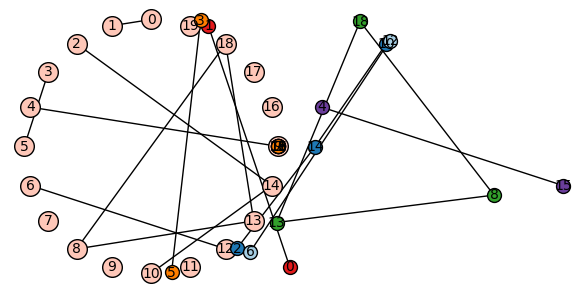

In [88]:
G = radicchi(G)